Práctica Python **UN**
## Camilo Andres Montilla - Jose Daniel Solano ##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
import seaborn as sns
import random as rd
import scipy as sc
import folium
import statsmodels.api as sm
from statsmodels.api import add_constant



# Punto 1: Convertir el código R en Python para generar un data.frame de manera análoga

In [ ]:
rd.seed(1018481038)
Seqlat = np.arange(-73.30, -73.25, 0.001)
Seqlong = np.arange(5.54, 5.58, 0.001)
latitude = pd.DataFrame.sample(pd.DataFrame(Seqlat), 100, replace = True)
latitude = list(latitude[0])
longitude = pd.DataFrame.sample(pd.DataFrame(Seqlong), 100, replace = True)
longitude = list(longitude [0])

## Data frame 1
xy = pd.DataFrame({'lat':latitude, 'lon': longitude})

## Data frame 2
SMI = np.partition (np.random.uniform(0.7,0.95,100), 10)
NDVI = np.partition (np.random.uniform(0.45,0.06,100), 10)
LST = np.partition (np.random.uniform(0.87,0.91, size = 100), 10)

df1 = pd.DataFrame({"Lat":latitude, "Lon":longitude, "SMI":SMI, "NDVI":NDVI, "LST":LST})
df1["Posición"] = np.arange(len(df1))

print(df1.head())

      Lat    Lon       SMI      NDVI       LST  Posición
0 -73.296  5.544  0.713044  0.070990  0.871233         0
1 -73.261  5.559  0.702020  0.062995  0.872253         1
2 -73.282  5.549  0.718671  0.067110  0.872308         2
3 -73.276  5.553  0.714594  0.070549  0.872723         3
4 -73.259  5.545  0.729520  0.080437  0.871133         4


**Discusión**: Se obtiene un código para Python semejante al asignado en R que cumple las caracteristicas y dasarrollos asignados para este caso

#Punto 2: Graficar la nube de puntos (solo coordenadas)

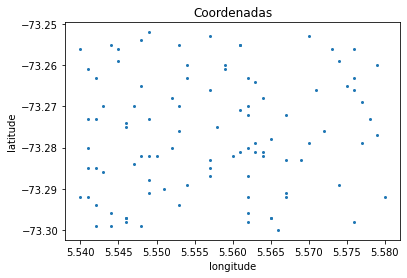

In [ ]:
plt.plot(longitude,latitude, 'o', markersize=2)
plt.title('Coordenadas')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

**Discusión:** Al generar la nube de puntos podemos evidenciar las diferentes coordenadas determinadas por su longitud y latitud.

# Punto 3: Asignar al gráfico un tamaño al punto de acuerdo con el SMI (graficar)

Text(0, 0.5, 'latitude')

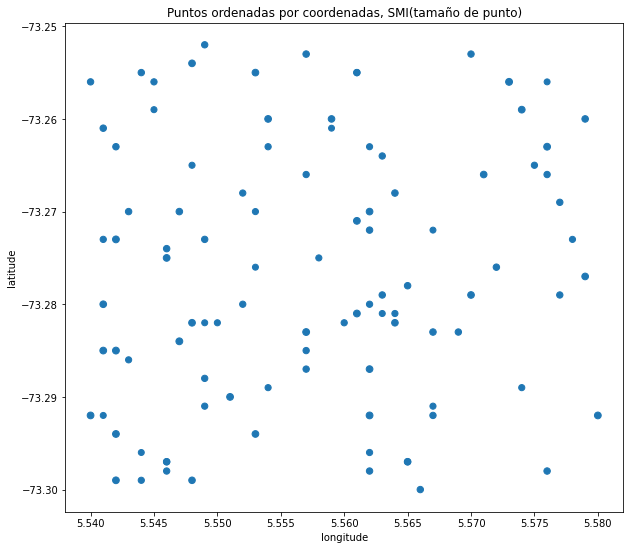

In [ ]:
sizes = SMI*50
plt.figure(figsize=(10,9))
plt.scatter(x, y, s=sizes,
            )
plt.title('Puntos ordenadas por coordenadas, SMI(tamaño de punto)')
plt.xlabel('longitude')
plt.ylabel('latitude')


**Discusión:** Se puede notar que la dispersion de puntos en el espacio evaluado es aparentemente normal (sin aglomeraciones de puntos hacia un sector determinado)

#Punto 4: Asignar al gráfico un color al punto de acuerdo con el NDVI (graficar)

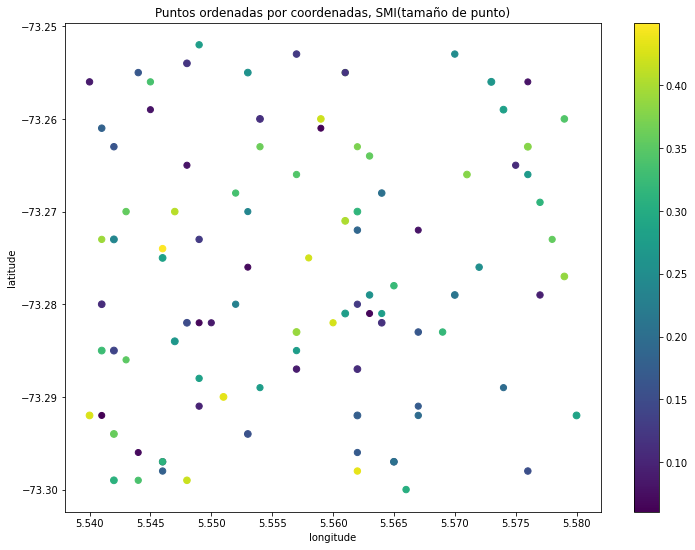

In [ ]:
x = longitude
y = latitude
colors = NDVI
sizes = SMI*50
markers = LST
plt.figure(figsize=(12,9))
plt.scatter(x, y, c=colors, s=sizes, 
            cmap='viridis')
plt.title('Puntos ordenadas por coordenadas, SMI(tamaño de punto)')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()

**Discusión:** En esta gráfica no se observa una dependencia espacial de la variable NDVI ya que el color del circulo externo para cada punto de muestreo es igual en toda el area geografica evaluada

#Punto 5:  Asignar al gráfico una forma al punto de acuerdo con el LST(graficar)

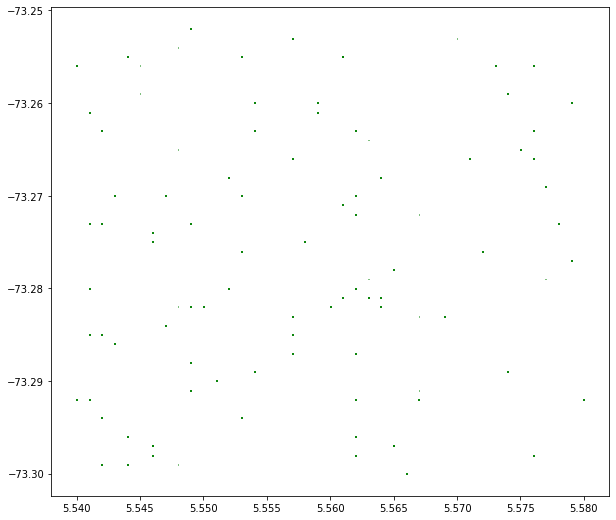

In [ ]:
plt.figure(figsize=(10,9))
plt.scatter(df1["Lon"], df1["Lat"], marker=",", color= "GREEN", s=df1["LST"])
plt.show()

**Discusión:** De igual forma, no se observa una dependencia espacial de la variable SLT, pues el muestreo es igual en toda el area geografica evaluada 

#Punto 6: Buscar alguna librería o programa(en última opción) que permita visualizar los puntos en el mapa de Colombia (¿están todos los puntos en Colombia? ¿pertenecen los puntos a alguna región específica de Colombia? ¿están todos los puntos dentro de esa región? Si alguno se sale de esa región (departamento), decartarlo y volver a graficar.

In [ ]:
Map = folium.Map(location = [5, -73],zoom_start = 6)
for i in range(len(xy['lat'])):
    folium.Marker(
        location = [xy['lon'][i],xy['lat'][i]],
        popup = f'lon: {xy["lon"][i]}, lat: {xy["lat"][i]}',
        icon = folium.Icon()
    ).add_to(Map)
Map

**Discusión:** Los puntos se ubican en el departamento de Boyacá, cercá a la cuidad de Tunja. Ningun punto se observa que este fuera de la región. Todos los puntos se muestran agrupados, sin ninguna variación.

#Punto 7: Realice un boxplot para SMI

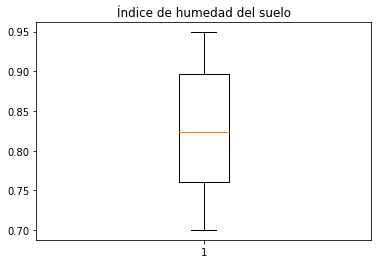

In [ ]:
plt.boxplot(SMI)
plt.title("Índice de humedad del suelo")
plt.show()

**Discusion**: Se puede ver que los valores se entre 0.70 y 0.95. Con una mediana en aproximadamente en 0.82. Lo que indica que la humedad del suelo está entre entre 70 y 95%. Por lo que creemos que los suelos se encuentran posiblemente saturados

#Punto 8: Realice un histograma para NDVI


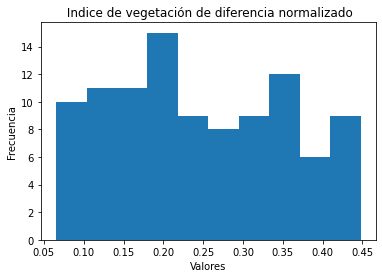

In [ ]:
NDVI
n, bins, patches=plt.hist(NDVI)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title(" Indice de vegetación de diferencia normalizado")
plt.show()

**Discusión:** Podemos ver que los datos muestran que no tienen una distribución uniforme, concentrandose inicialmente de 0.07 a 0.20. Con está información se puede pensar que los datos no tienen una distribución normal. 

##Punto 9: Grafique la densidad para LST

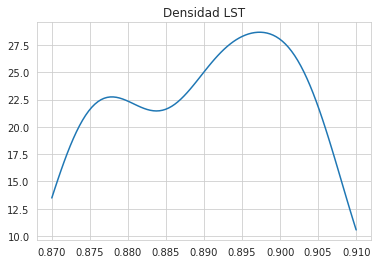

In [ ]:
LST
density = kde.gaussian_kde(LST)
x = np.linspace(0.87,0.91,100)
y=density(x)

plt.plot(x, y)
plt.title("Densidad LST")
plt.show()

**Discusión**: Observamos que la temperatura en la superficie del suelo mantiene una distribución continua, donde la mayor temperatura se concentra en 0.885 y 0.905. 

#Punto 10: Calcule estadísticas descriptivas para las 3 variables

In [ ]:
df2 = pd.DataFrame({"SMI":SMI, "NDVI":NDVI,"LST":LST })
df2.describe()

,SMI,NDVI,LST
count,100.000000,100.000000,100.000000
mean,0.825457,0.253543,0.889964
std,0.077289,0.108140,0.011500
min,0.700140,0.067785,0.870320
25%,0.760504,0.167937,0.879349
50%,0.824081,0.254735,0.891148
75%,0.896324,0.350130,0.899937
max,0.949209,0.446082,0.909268


**Discusion:** Se puede ver que las tres variables tienen la misma cantidad de información, tambien se puede ver que el rango de datos no es tan amplio, por lo cúal la desviación estandar es baja en las tresvariables. 

#Punto 11: Fracciones los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante

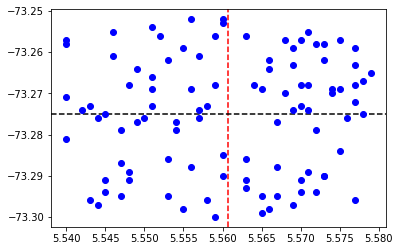

       lat    lon factor       smi      ndvi       lst
0  -73.277  5.554    III  0.711348  0.077701  0.870612
1  -73.256  5.563      I  0.702223  0.066521  0.871968
2  -73.285  5.560    III  0.703533  0.065371  0.870400
3  -73.261  5.557     II  0.706587  0.072309  0.871209
4  -73.286  5.553    III  0.709673  0.081220  0.870700
..     ...    ...    ...       ...       ...       ...
95 -73.281  5.540    III  0.872524  0.370000  0.903933
96 -73.270  5.568      I  0.940760  0.237781  0.891361
97 -73.297  5.544    III  0.898284  0.327914  0.907568
98 -73.275  5.578      I  0.812371  0.328852  0.906299
99 -73.291  5.548    III  0.946374  0.255524  0.897569

[100 rows x 6 columns]


lat                       ...       lst                    
       count       mean       std  ...       50%       75%       max
factor                             ...                              
I       30.0 -73.264967  0.006111  ...  0.888646  0.893861  0.908664
II      26.0 -73.263577  0.007860  ...  0.888401  0.897020  0.906884
III     24.0 -73.287458  0.008081  ...  0.886492  0.898840  0.907568
IV      20.0 -73.290100  0.006750  ...  0.899132  0.904108  0.909822

[4 rows x 40 columns]

In [ ]:
lonmedia = np.mean(xy['lon'])
latmedia = np.mean(xy['lat'])
plt.axvline(x=lonmedia, color="red", linestyle="--")
plt.axhline(y=latmedia, color="black", linestyle="--")
plt.plot(xy['lon'], xy['lat'], 'bo')
plt.show()
conditions = [
    (xy['lon'] > lonmedia) & (xy['lat'] > latmedia),
    (xy['lon'] < lonmedia) & (xy['lat'] > latmedia),
    (xy['lon'] < lonmedia) & (xy['lat'] < latmedia),
    (xy['lon'] > lonmedia) & (xy['lat'] < latmedia)
    ]

fac = ['I', 'II', 'III', 'IV']

xy['factor'] = np.select(conditions, fac)

xy['smi']= SMI
xy['ndvi']= NDVI
xy['lst']= LST

print(xy)

xy.groupby('factor').describe()

**Discusión:** Se puede ver que en los cuatro cuadrantes la informacion se distribuyo los más uniforme posible. Dondé el cuadrante I es que tiene mayor cantidad de datos y disminuye según avanza el cuadrante. Las medias en todas la variables tienden a ser la mismas y las desviaciones estandar tambien para los cuatro cuadrantes siguen siendo bajas.

#Punto 12: Realice un boxplot para SMI que muestre las cajas de los 4 cuadrantes en el mismo gráfico

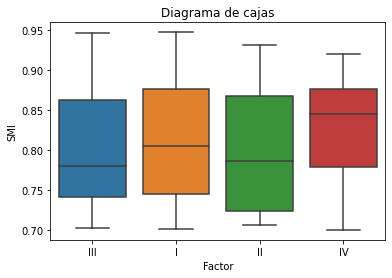

In [ ]:
sns.boxplot(data=xy, x='factor', y='smi')
plt.ylabel('SMI')
plt.xlabel('Factor')
plt.title('Diagrama de cajas')
plt.show()

**Discusión:** En el primer cuadrante (color azul) es posible observar que la tendencia central se encuentra entre 0,74 y 0,86, con mediana aproximadamente de 0,78 y datos atípicos superiores de un rango de 0,09 e inferiores de 0,04 de distancia de la tendencia de datos. En el segundo cuadrante (color naranja) la tendecia central está ubicada de 0,75 a 0,87, con mediana de 0,81, datos atípicos superiores de 0,87 a 0,95 e inferiores de 0,70 a 0,75. En el tercer cuadrante (color verde) hay datos atípicos inferiores de 0,71 a 0,73, superiores de 0,86 a 0,94, tendencia central de 0,73 a 0,86 y mediana de 0,79. Por último, el cuarto cuadrante (color rojo) muestra tendencia central de 0,785 a 0,87, mediana de 0,85 y datos atípicos en la parte inferior de 0,085 y superior 0,05 de distancia de la tendecia central

#Punto 13: Realice un histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)


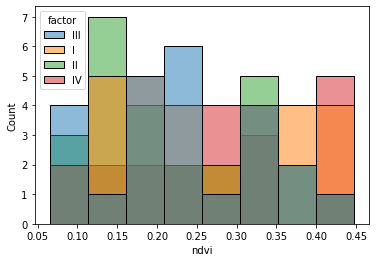

In [ ]:
xy.groupby('factor')
sns.histplot(data=xy,x="ndvi", hue="factor")

**Discusión**: En general las cuatro graficos no tienen diferencias. Los cuatro factores se agrupan de similar manera. 

#Punto 14: Realice un gráfico de densidades múltiple para LST que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo las densidades)

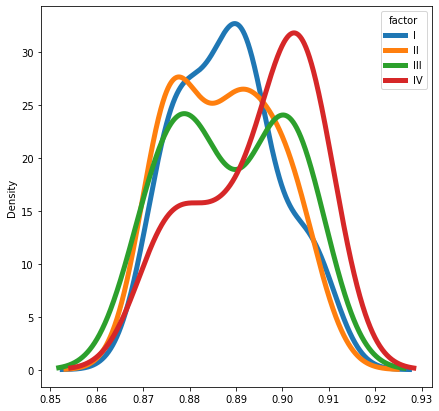

In [ ]:
df1=xy.pivot(columns='factor', values='lst') 

df1.plot.density(figsize = (7, 7), 
                       linewidth = 5) 

**Discusión:** Al igual que en el punto anterior, no se observan grandes diferencias entre las graficas. Las graficas se comportan de igual manera y se observan casi que similares. El factor III es el unico que tiene alguna diferencia mostrando una forma de M. Comó se mensiono en los puntos antriores la media de los cuatro factores se encuantran muy cera, en esta grafica se puede ver que como las desviaciones son pequeñas. por eso no hay mucha diferencias en las graficas.

#Punto 15: Construya una matriz de correlaciones de Pearson para las 5 variables

In [ ]:
df2=pd.DataFrame({'lat' : latitude, 'lon': longitude,  'lst':LST ,'smi': SMI,'ndvi':NDVI })
df2.corr()
corr= df2.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,lat,lon,lst,smi,ndvi
lat,1.000000,0.069993,-0.169613,-0.009545,-0.042920
lon,0.069993,1.000000,0.070557,0.057191,0.114566
lst,-0.169613,0.070557,1.000000,0.823221,0.803328
smi,-0.009545,0.057191,0.823221,1.000000,0.768129
ndvi,-0.042920,0.114566,0.803328,0.768129,1.000000


**Discusión:**  Obtenemos valores menores que 0 indica que existe una correlación negativa, es decir, que las dos variables están asociadas en sentido inverso, valores cercanos a -1, mayor es la fuerza de esa relación invertida. Además, valores mayores que 0, lo que muestra que existe una correlación positiva, variables estarían asociadas en sentido directo y valores exacto de +1 indicaría una relación lineal positiva perfecta.
Finalmente, una correlación próxima a 0, indica que no hay relación lineal entre las variables

#Punto 16: Realice un gráfico de correlaciones para las 5 variables


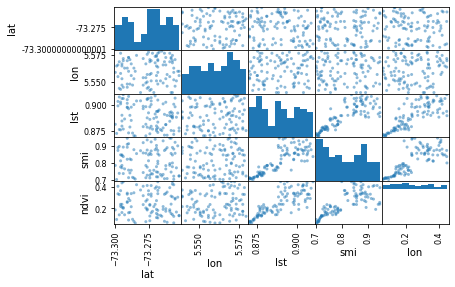

In [ ]:
pd.plotting.scatter_matrix(df2)
sns.regplot(x=df2["lon"], y=df2["lat"], line_kws={"color":"g","alpha":0.7,"lw":5})

#Punto 17: Fraccione el gráfico de correlaciones por cuadrante y muestre las 4 figuras en un solo gráfico

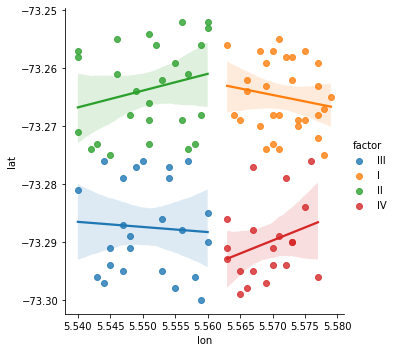

In [ ]:
sns.lmplot(x="lon", y="lat", hue="factor", data=xy)

**Discusión:** Respecto al cuadrante II y IV, se evidencia una correlación positiva, mientras que por otro lado en los cuadrantes I y III, tenemos una correlación negativa, notando que en el cuadrante I puede que no exista una correlación determinada

#Punto 18: Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST

In [ ]:

y = df1['NDVI'] # v. dependiente
x = df1['LST'] # v independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary) 

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           3.56e-23
Time:                        17:57:35   Log-Likelihood:                 131.44
No. Observations:                 100   AIC:                            -258.9
Df Residuals:                      98   BIC:                            -253.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4156      0.511    -12.561      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Discusión:** Con los resultados obtenidos se puede determinar que el 63.5% de la variacion con una probabilidad de 3.56e-23 de NDVI corresponde a LST. Con esta informacion se deduce que la la variacion correspondiente a LST en media, porque aún hay un 36.5% de variación explicada por otros factores.

#Punto 19: Ajuste un modelo de regresión multiple entre NDVI (respuesta) con  LST y SMI

In [ ]:
y = df1['NDVI'] # v. dependiente
x = df1[{'LST',"SMI"}] # v. independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.79e-25
Time:                        18:03:04   Log-Likelihood:                 139.79
No. Observations:                 100   AIC:                            -273.6
Df Residuals:                      97   BIC:                            -265.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3135      0.540     -9.833      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Discusión:** En este caso podemos ver que la variacion de NDVI esta explicada en un 69.1% y con una probabilidad de 1.79e-25 esta explicada por las variables LST y SMI. Lo que dejaria que el 30% restante es explicado por otras variables. Está informacio puede dar un caracterisación real de lo que se puede encontrar en campo. 



#Punto 20: Tome una muestra del 80% del data.frame y calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos.

In [ ]:
muestra_xy = df1.sample(80)
print(muestra_xy )
muestra_xy.corr()
mc= muestra_xy.corr ()
mc.style.background_gradient (cmap = 'coolwarm')

       Lat    Lon       SMI      NDVI       LST  Posición
11 -73.299  5.563  0.722187  0.102050  0.874654        11
53 -73.278  5.561  0.792284  0.303419  0.878314        53
39 -73.268  5.580  0.852854  0.191052  0.884359        39
41 -73.296  5.561  0.896169  0.214616  0.891509        41
32 -73.264  5.542  0.750491  0.194954  0.887219        32
..     ...    ...       ...       ...       ...       ...
23 -73.298  5.565  0.751764  0.161370  0.894661        23
74 -73.278  5.570  0.922065  0.332691  0.903432        74
37 -73.286  5.561  0.850316  0.208653  0.878975        37
89 -73.283  5.573  0.781394  0.363573  0.903619        89
19 -73.254  5.556  0.748051  0.165958  0.879637        19

[80 rows x 6 columns]


,Lat,Lon,SMI,NDVI,LST,Posición
Lat,1.000000,-0.187185,0.085023,0.004640,0.043354,-0.031425
Lon,-0.187185,1.000000,-0.255452,-0.045228,-0.073057,-0.015603
SMI,0.085023,-0.255452,1.000000,0.595436,0.521714,0.638775
NDVI,0.004640,-0.045228,0.595436,1.000000,0.789244,0.892530
LST,0.043354,-0.073057,0.521714,0.789244,1.000000,0.828142
Posición,-0.031425,-0.015603,0.638775,0.892530,0.828142,1.000000


**Discusión:** Podemos ver que aún no existe correlación entre las variables y longitud y latitud. De igual manera vemos que existen correlaciones entre SMI, NDVI y LST. Con respecto al primer cuadro de correlaciones estas disminuyeron, pero aun se siguen manteniendo. De igual manera dondé mas  existe correlación es entre LST y NDVI.

#Punto 21: Haga un gráfico 3D para las 3 variables ambientales

In [ ]:
f = px.scatter_3d(df1, x = 'SMI', 
                    y = 'NDVI', 
                    z = 'LST')
  
f.show()

**Discusión:** Los puntos no muestran ningún patron dentro del cubo, se observa una pequeña agrupasión en la esquina de LST y SMI. Pero en general no se muestran más agrupasiones, la distribucion no se muestra uniforme. 

#Punto 22: Haga un gráfico 3D para las 3 variables ambientales y asigne color según cuadrante

In [ ]:
fig = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst',
                    color = 'factor')
fig.show()

**Discusión:** Comó en el punto anterior no se ve ningún patron en la grafica. 

#Punto 23: Investigue como se construye una matriz de distancias entre todos las coordenadas

In [ ]:
from scipy.spatial import distance_matrix
m = np.stack([xy['lat'],xy['lon']], axis=1)
mm=distance_matrix(m, m)
print(mm)

[[0.         0.04045986 0.03008322 ... 0.02193171 0.02209072 0.02022375]
 [0.04045986 0.         0.02009975 ... 0.01886796 0.03324154 0.03101612]
 [0.03008322 0.02009975 0.         ... 0.01264911 0.01431782 0.03228002]
 ...
 [0.02193171 0.01886796 0.01264911 ... 0.         0.01802776 0.01964688]
 [0.02209072 0.03324154 0.01431782 ... 0.01802776 0.         0.03330165]
 [0.02022375 0.03101612 0.03228002 ... 0.01964688 0.03330165 0.        ]]


**Discusión:** Los elementos que se tienen representan las distancias entre los puntos, tomados por pares, teniendo que todas las distancias son menores a 0,05

#Punto 24: Ubique el centroide de toda la nube de puntos de coordenadas y seleccione solo puntos en una ventana de radio a lo sumo igual a 2/3 de la máxima distancia en la matriz de distancias

(-73.27683999999988, 5.562220000000007)


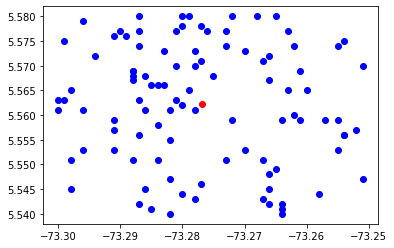

In [ ]:
data= np.array(m)
def centroid(array):
  length=array.shape[0]
  sum_x =np.sum(array[:,0])
  sum_y =np.sum(array[:,1])
  return sum_x /length ,sum_y/length

centroide= centroid(data)
print(centroide)
plt.plot(xy['lat'],xy['lon'],'bo')
plt.scatter(centroide[0],centroide[1],c="r")

**Discusión:** En el grafico se puede encontrar el punto rojo el cuál simboliza el centro de la nube de puntos y donde es estima que van a estar los puntos dentro del radio.

#Punto 25: Calcule estadísticas descriptivas en esta ventana circular (dibuje la ventana) y asigne un color diferente a los puntos dentro de esta ventana.

(-73.27683999999988, 5.562220000000007)


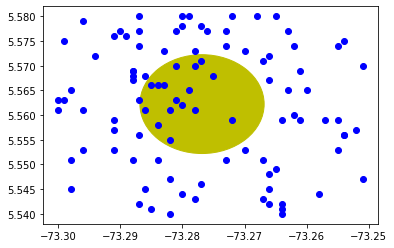

In [ ]:
centroide = centroid(data)
print(centroide)
circle = plt.Circle((centroide), 0.01, color='y')
fig, ax = plt.subplots()
ax.add_patch(circle)

plt.plot(xy['lat'],xy['lon'],'bo')
plt.scatter(centroide[0],centroide[1],c="r")

**Discusión:** Dentro de la nube se puede encontrar 17 puntos que estan dentro de la ventana circular. 

#Profe con mi compañero solo pudimos realizar hasta este punto. Mil disculpas profe. Y agradecemos su comprensión.